In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews'
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


100%|██████████| 25.7M/25.7M [00:00<00:00, 151MB/s] 

In [ ]:
!pip install datasets


In [ ]:
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset('imdb')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
!pip install torchtext

  Using cached torchtext-0.18.0-cp310-cp310-manylinux1_x86_64.whl.metadata (7.9 kB)
Using cached torchtext-0.18.0-cp310-cp310-manylinux1_x86_64.whl (2.0 MB)


In [ ]:
!pip uninstall -y torch torchtext



Found existing installation: torch 2.4.0+cu121
Uninstalling torch-2.4.0+cu121:
  Successfully uninstalled torch-2.4.0+cu121
Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Successfully uninstalled torchtext-0.18.0


In [ ]:
!pip install torch


In [ ]:
from datasets import load_dataset
from transformers import BertTokenizer, BertModel
import torch

# Load the IMDB dataset
dataset = load_dataset('imdb')

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenisation function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

# Apply the tokenizer to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Get a sample review
sample_input_ids = torch.tensor(tokenized_datasets['train']['input_ids'][:1])  # Get the first review's token IDs
sample_attention_mask = torch.tensor(tokenized_datasets['train']['attention_mask'][:1])  # Get attention mask

# Get embeddings from BERT
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    outputs = model(sample_input_ids, attention_mask=sample_attention_mask)

# The embeddings are in the 'last_hidden_state' output
embeddings = outputs.last_hidden_state.squeeze(0)  # Remove batch dimension


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

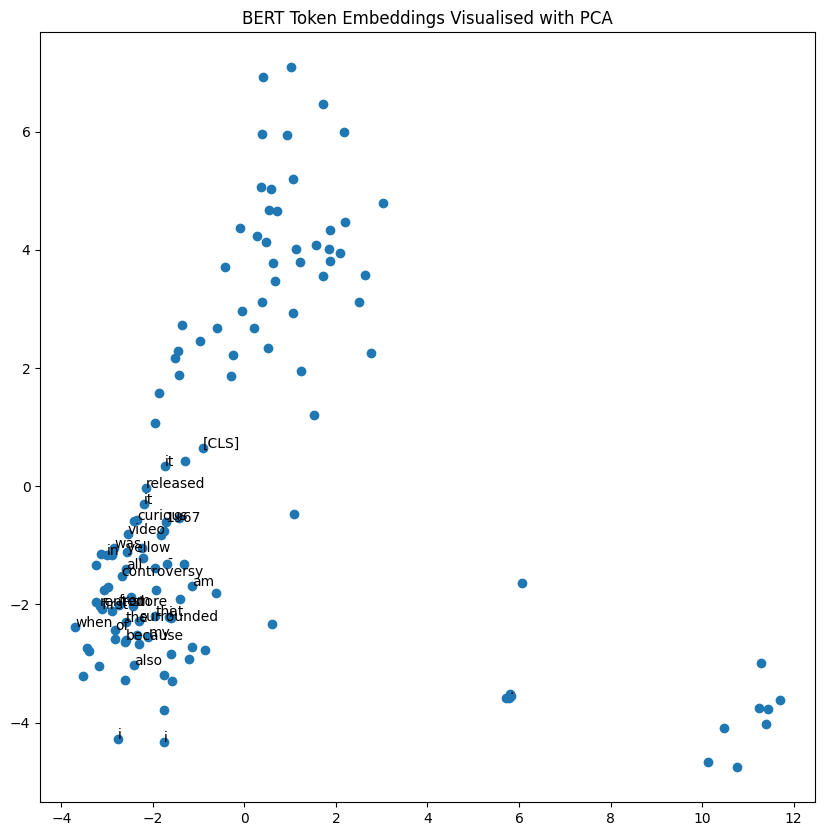

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')

# Annotate with token index or token itself if you want
tokens = tokenizer.convert_ids_to_tokens(sample_input_ids[0].tolist())
for i, token in enumerate(tokens[:30]):  # Limiting to 30 tokens for readability
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("BERT Token Embeddings Visualised with PCA")
plt.show()


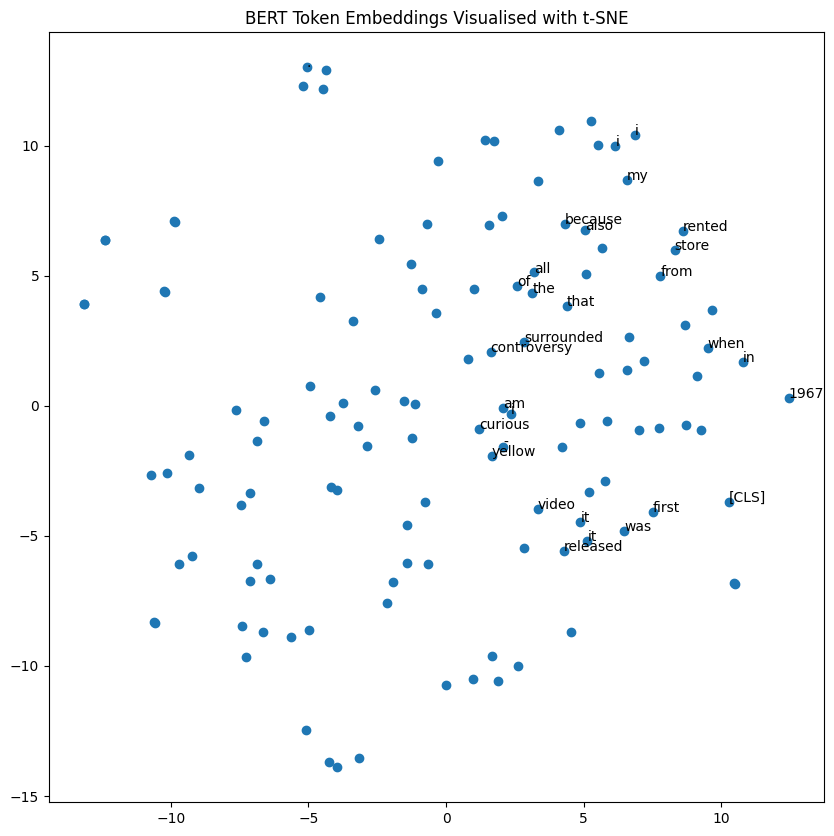

In [ ]:

from sklearn.manifold import TSNE

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings_tsne = tsne.fit_transform(embeddings)

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], marker='o')

# Annotate with token index or token itself if you want
for i, token in enumerate(tokens[:30]):  # Limiting to 30 tokens for readability
    plt.annotate(token, (reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1]))

plt.title("BERT Token Embeddings Visualised with t-SNE")
plt.show()



In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert the dataset to PyTorch tensors
train_input_ids = torch.tensor(tokenized_datasets['train']['input_ids'])
train_attention_mask = torch.tensor(tokenized_datasets['train']['attention_mask'])
train_labels = torch.tensor(tokenized_datasets['train']['label'])

test_input_ids = torch.tensor(tokenized_datasets['test']['input_ids'])
test_attention_mask = torch.tensor(tokenized_datasets['test']['attention_mask'])
test_labels = torch.tensor(tokenized_datasets['test']['label'])


In [ ]:
# Create PyTorch Datasets and DataLoader
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
import torch.nn as nn

class SentimentModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        packed_output, (hidden, _) = self.lstm(embedded)
        output = self.fc(self.dropout(hidden[-1]))  # Fully connected layer on the hidden state
        return output


In [ ]:
# Loss function and optimizer
# Model parameters
vocab_size = tokenizer.vocab_size  # Using BERT's vocabulary size
embed_dim = 128  # Embedding size
hidden_dim = 256  # LSTM hidden units
output_dim = 2  # Binary classification (positive/negative)

# Instantiate the model
model = SentimentModel(vocab_size, embed_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)  # Adam optimizer


In [ ]:
def train_model(model, train_dataloader, criterion, optimizer, epochs=10):
    model.train()

    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0

        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch

            # Zero out gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(input_ids, attention_mask)

            # Compute loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Compute accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

        avg_loss = total_loss / len(train_dataloader)
        accuracy = correct_predictions / len(train_dataloader.dataset)

        print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss}, Accuracy: {accuracy}')

# Train the model
train_model(model, train_dataloader, criterion, optimizer)


Epoch 1/10, Loss: 0.6930823420303721, Accuracy: 0.51976
Epoch 2/10, Loss: 0.6360555851375607, Accuracy: 0.63456
Epoch 3/10, Loss: 0.45381202616908195, Accuracy: 0.79912
Epoch 4/10, Loss: 0.336962361386855, Accuracy: 0.86352
Epoch 5/10, Loss: 0.2453480703352223, Accuracy: 0.90812
Epoch 6/10, Loss: 0.16294484003134171, Accuracy: 0.94296
Epoch 7/10, Loss: 0.10195301059587017, Accuracy: 0.96756
Epoch 8/10, Loss: 0.06612088480645223, Accuracy: 0.979
Epoch 9/10, Loss: 0.044009496465080906, Accuracy: 0.98632
Epoch 10/10, Loss: 0.03519021297530322, Accuracy: 0.98944


In [ ]:
def evaluate_model(model, test_dataloader, criterion):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():  # Disable gradient computation
        for batch in test_dataloader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()

    avg_loss = total_loss / len(test_dataloader)
    accuracy = correct_predictions / len(test_dataloader.dataset)

    print(f'Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Evaluate the model
evaluate_model(model, test_dataloader, criterion)


Test Loss: 1.0887, Test Accuracy: 0.7855


In [ ]:
# Save the trained model to a file
torch.save(model.state_dict(), 'lstm_sentiment_model.pth')

# Optionally, save the tokenizer as well
tokenizer.save_pretrained('tokenizer/')


('tokenizer/tokenizer_config.json',
 'tokenizer/special_tokens_map.json',
 'tokenizer/vocab.txt',
 'tokenizer/added_tokens.json')

In [ ]:
# Load the tokenizer if needed
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('tokenizer/')

# Define the model architecture (same as the one used during training)
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, input_ids, attention_mask):
        embedded = self.embedding(input_ids)
        packed_output, (hidden, _) = self.lstm(embedded)
        output = self.fc(self.dropout(hidden[-1]))  # Fully connected layer on the hidden state
        return output


# Model parameters (use the same as during training)
# Model parameters
vocab_size = tokenizer.vocab_size  # Using BERT's vocabulary size
embed_dim = 128  # Embedding size
hidden_dim = 256  # LSTM hidden units
output_dim = 2  # Binary classification (positive/negative)

# Instantiate the model
model = SentimentModel(vocab_size, embed_dim, hidden_dim, output_dim)


# Load the saved model weights
model.load_state_dict(torch.load('lstm_sentiment_model.pth'))

# Set the model to evaluation mode
model.eval()


<ipython-input-16-57d652d851d7>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('lstm_sentiment_model.pth'))


SentimentModel(
  (embedding): Embedding(30522, 128)
  (lstm): LSTM(128, 256, batch_first=True)
  (fc): Linear(in_features=256, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
# Make prediction on new data
new_review = " The movie is not enjoyable. The story and acting both are irretating "

# Tokenize the new review using the saved tokenizer
inputs = tokenizer(new_review, return_tensors="pt", padding="max_length", truncation=True, max_length=128)

# Create a dummy attention mask (all ones)
dummy_attention_mask = torch.ones(inputs['input_ids'].shape)

# Get predictions from the model
with torch.no_grad():  # Disable gradient calculation for inference
    logits = model(inputs['input_ids'], attention_mask=dummy_attention_mask)

# Convert logits to probabilities
probs = torch.softmax(logits, dim=1)

# Get the predicted class (0 = negative, 1 = positive)
predicted_class = torch.argmax(probs).item()

# Output the predicted sentiment
sentiment = "positive" if predicted_class == 1 else "negative"
print(f"Predicted sentiment: {sentiment}")

Predicted sentiment: negative
